# Example: Computing Stylized Facts for Daily Equity Log Return Data
The log return of a stock price is the natural logarithm of the ratio of the stock's price at the end of a period to its price at the beginning of that period. Let $S_{i,t-1}$ denote the continuously compounding share price of ticker $i$ at time $t-1$. 
Then, at time $t$, the share price is given by:
$$
\begin{equation}
    S_{i,t} = S_{i,t-1}\cdot\exp\left(\mu^{(i)}_{t,t-1}\cdot{\Delta{t}}\right)
\end{equation}
$$
where $\mu^{(i)}_{t,t-1}$ denotes the growth rate (units: inverse years) of ticker $i$ over 
the time horizon $\Delta{t}$ (units: years). The logarithmic return $\bar{r}^{(i)}_{t,t-1}$ of ticker $i$ over time horizon 
$\Delta{t}$ is defined as:
$$
\begin{equation}
\bar{r}^{(i)}_{t,t-1} \equiv \ln\left(\frac{S_{i,t}}{S_{i,t-1}}\right) = \mu^{(i)}_{t,t-1}\cdot{\Delta{t}}
\end{equation}
$$
where $\bar{r}^{(i)}_{t,t-1}$ (dimensionless) is the product of the growth rate $\mu^{(i)}_{t,t-1}$ and the time interval $\Delta{t}$.
While prices are not stationary, the logarithmic returns are often assumed to be stationary.

### Learning objectives
This example will familiarize students with computing the log growth (return) $\mu$ time series and the analysis of some of the statistical properties of that data.
* __Prerequisites__: Load and clean the historical dataset. In this task, we'll load daily price data for stocks in the [SP500 index](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies) and a few [ETFs](https://en.wikipedia.org/wiki/Exchange-traded_fund), and throw away tickers that do not have the maximum amount of data.
* __Task 1__: Compute the log growth rate array. In this task, we will compute the log growth rate array for every ticker in the `dataset` using [the `log_growth_matrix(...)` method](https://varnerlab.github.io/VLQuantitativeFinancePackage.jl/dev/equity/#VLQuantitativeFinancePackage.log_growth_matrix).
* __Task 2__: Is the log growth rate Normally distributed? In this task, we explore one of the central stylized facts: returns (growth) are not normally distributed.
* __Task 3__: Autocorrelation and Volatility clustering. In this task, we'll compute the autocorrelation and volatility clustering, i.e., the autocorrelation of the absolute value of the growth rate for tickers in the `dataset.`

## Setup
We set up the computational environment by including the `Include.jl` file. The `Include.jl` file loads external packages, various functions we will use in the exercise, and custom types to model the components of our example problem.
* See the [Julia programming language documentation](https://docs.julialang.org/en/v1/) and the [VLQuantitativeFinancePackage.jl documentation](https://github.com/varnerlab/VLQuantitativeFinancePackage.jl) for additional information on functions and types used in this material. 

In [3]:
include("Include.jl")

    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed Accessors ─────── v0.1.38
   Installed Roots ─────────── v2.2.0
   Installed HypothesisTests ─ v0.11.2
    Updating `~/Desktop/julia_work/CHEME-5660-CourseRepository-Fall-2024/lectures/week-4/L4a/Project.toml`
  [336ed68f] + CSV v0.10.14
  [5ae59095] + Colors v0.12.11
  [a93c6f00] + DataFrames v1.6.1
  [864edb3b] + DataStructures v0.18.20
  [31c24e10] + Distributions v0.25.111
  [c87230d0] + FFMPEG v0.4.1
  [5789e2e9] + FileIO v1.16.3
  [09f84164] + HypothesisTests v0.11.2
⌃ [033835bb] + JLD2 v0.4.53
  [91a5bcdd] + Plots v1.40.8
  [08abe8d2] + PrettyTables v2.3.2
  [2913bbd2] + StatsBase v0.34.3
  [f3b207a7] + StatsPlots v0.15.7
  [4119e0bf] + VLQuantitativeFinancePackage v1.0.0-DEV `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git#main`
  [10745b16] ~ Statistics ⇒ v1.10.0
    U

MyMarketDataSet (generic function with 1 method)

## Prerequisites: Load and clean the historical dataset
We gathered a daily open-high-low-close `dataset` for each firm in the [S&P500](https://en.wikipedia.org/wiki/S%26P_500) from `01-03-2018` until `12-29-2023`, along with data for a few exchange-traded funds and volatility products during that time. We load the `orignal_dataset` by calling [the `MyMarketDataSet()` function](src/Files.jl):

In [5]:
original_dataset = MyMarketDataSet() |> x-> x["dataset"];

### Clean the data
Not all tickers in our dataset have the maximum number of trading days for various reasons, e.g., acquisition or de-listing events. Let's collect only those tickers with the maximum number of trading days.
* First, let's compute the number of records for a company that we know has a maximum value, e.g., `AAPL,` and save that value in the `maximum_number_trading_days` variable:

In [7]:
maximum_number_trading_days = original_dataset["AAPL"] |> nrow;

Now, iterate through the `original_dataset` and collect only tickers with `maximum_number_trading_days` records. Save that data in the `dataset::Dict{String,DataFrame}` variable:

In [9]:
dataset = Dict{String,DataFrame}();
for (ticker, data) ∈ original_dataset
    if (nrow(data) == maximum_number_trading_days)
        dataset[ticker] = data;
    end
end
dataset

Dict{String, DataFrame} with 460 entries:
  "NI"   => 1508×8 DataFrame…
  "EMR"  => 1508×8 DataFrame…
  "CTAS" => 1508×8 DataFrame…
  "HSIC" => 1508×8 DataFrame…
  "KIM"  => 1508×8 DataFrame…
  "PLD"  => 1508×8 DataFrame…
  "IEX"  => 1508×8 DataFrame…
  "BAC"  => 1508×8 DataFrame…
  "CBOE" => 1508×8 DataFrame…
  "EXR"  => 1508×8 DataFrame…
  "NCLH" => 1508×8 DataFrame…
  "CVS"  => 1508×8 DataFrame…
  "DRI"  => 1508×8 DataFrame…
  "DTE"  => 1508×8 DataFrame…
  "ZION" => 1508×8 DataFrame…
  "AVY"  => 1508×8 DataFrame…
  "EW"   => 1508×8 DataFrame…
  "EA"   => 1508×8 DataFrame…
  "NWSA" => 1508×8 DataFrame…
  "CAG"  => 1508×8 DataFrame…
  "GPC"  => 1508×8 DataFrame…
  "FCX"  => 1508×8 DataFrame…
  "GILD" => 1508×8 DataFrame…
  "UNP"  => 1508×8 DataFrame…
  "CDW"  => 1508×8 DataFrame…
  ⋮      => ⋮

Now that we have removed firms that are missing data let's get a list of firms that we have in the cleaned up `dataset` and save it in the `list_of_all_tickers` array (sorted alphabetically):

In [11]:
list_of_all_tickers = keys(dataset) |> collect |> sort;

Finally, we are using daily data, so our natural time step $\Delta{t}$ will be one trading day in units of years:

In [65]:
Δt = (1/252);

## Task 1: Compute the log growth rate array
In this task, we will compute the log growth rate array for every ticker in the `dataset` using [the `log_growth_matrix(...)` method](https://varnerlab.github.io/VLQuantitativeFinancePackage.jl/dev/equity/#VLQuantitativeFinancePackage.log_growth_matrix). 
* The [`log_growth_matrix(...)` method](https://varnerlab.github.io/VLQuantitativeFinancePackage.jl/dev/equity/#VLQuantitativeFinancePackage.log_growth_matrix) takes `dataset` $\mathcal{D}$ and a list of firms $\mathcal{L}$ and computes the growth rate values for each firm as a function of time. The data is returned as a $\mathcal{D}_{i}\times\dim\mathcal{L}$ array (time on the rows, firm $i$ on the columns). We store the data in the `all_firms_growth_matrix::Array{Float64,2}` variable:

In [15]:
all_firms_growth_matrix = log_growth_matrix(dataset, list_of_all_tickers, Δt = Δt);

### Visualize
Specify a ticker symbol to explore in the `ticker_to_visualize::String` variable (this needs to be in the dataset):

In [128]:
ticker_to_visualize = "MET";

#### Summary
`Unhide` the code block below to see how we plotted the daily growth rate and its distribution for the ticker specified in the `ticker_to_visualize::String` variable.
* __Growth rate__: The growth (return) data appears to be a stationary random process with non-periodic periods of extreme volatility followed by small fluctuations around the mean (which appears to be near zero). 

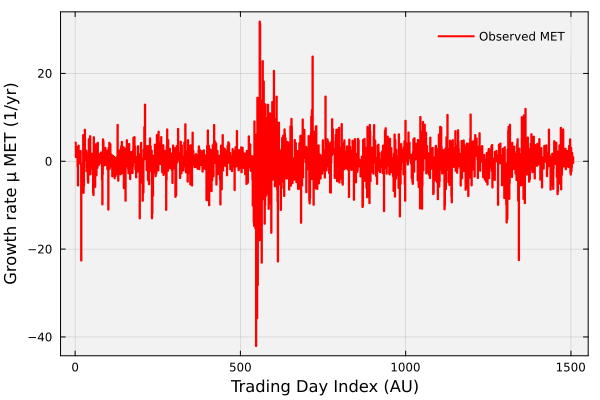

In [138]:
let
    i = findfirst(ticker -> ticker == ticker_to_visualize,list_of_all_tickers);
    X = all_firms_growth_matrix[:,i];

    plot(X, label="Observed $(ticker_to_visualize)", lw=2, c=:red, 
        bg="gray95", background_color_outside="white", framestyle = :box, fg_legend = :transparent, linetype=:steppost)

    xlabel!("Trading Day Index (AU)", fontsize=18);
    ylabel!("Growth rate μ $(ticker_to_visualize) (1/yr)", fontsize=18)
end

* __Fat tails__: The observed growth rate data (for the example ticker `MET`) has a higher density near zero (many small moves) and extreme tails (large moves) compared to [a Normal distribution](https://en.wikipedia.org/wiki/Normal_distribution). The observed data for `MET` _seems_ to follow [a Laplace distribution](https://en.wikipedia.org/wiki/Laplace_distribution). However, other ticker symbols may be different.

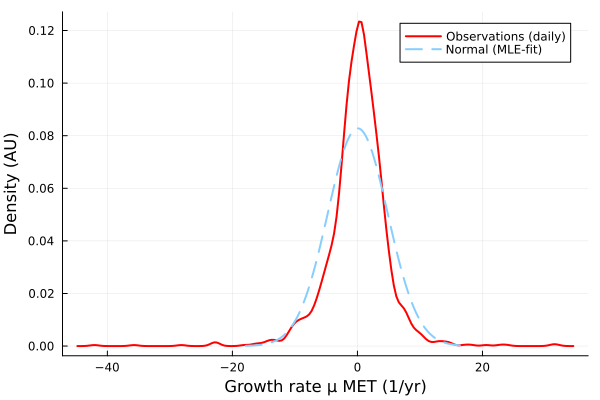

In [130]:
let
    μ = findfirst(ticker -> ticker == ticker_to_visualize, list_of_all_tickers) |> i -> all_firms_growth_matrix[:,i];
    density(μ, c=:red, lw=2, label="Observations (daily)")

    # fit a Normal, and plot that -
    d = fit_mle(Normal, μ);
    plot!(d, c=:skyblue1, lw = 2, ls = :dash, label="Normal (MLE-fit)")

    # labels -
    xlabel!("Growth rate μ $(ticker_to_visualize) (1/yr)", fontsize=18)
    ylabel!("Density (AU)", fontsize=18);
end

## Task 2: Is the log growth rate $\mu$ normally distributed?
In this task, we explore one of the central stylized facts: returns (growth) are not normally distributed. Return distributions have `fat tails,` i.e., the density of the returns near zero is more significant than that of a normal distribution, and there is more density on the tails of the distribution. 

* Let's develop a procedure based on the [Anderson–Darling test](https://en.wikipedia.org/wiki/Anderson–Darling_test) and the [Kolmogorov-Smirnov test](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test) exported by the [HypothesisTests.jl package](https://github.com/JuliaStats/HypothesisTests.jl) to estimate which firms in the dataset $\mathcal{D}$ follow a [Laplace distribution](https://en.wikipedia.org/wiki/Laplace_distribution)

Suppose we define the class set $\mathcal{C}\equiv\left\{\text{normal},\text{laplace},\text{undefined}\right\}$ to describe the possible types of returns. Classify the shape of the returns for each of the firms in the `dataset` $\mathcal{D}$, where for each firm $i$ we compute a classification $c_{i}\in\left\{\text{normal},\text{laplace},\text{undefined}\right\}$. For each statistical test, use a `pvalue = 0.0001` cutoff.
* `Normal`: Test for normality of the return for firm $i$ using a one-sample [Anderson–Darling test](https://en.wikipedia.org/wiki/Anderson–Darling_test).
* `Laplace`: If the return for firm $i$ is `NOT` normal, use a one-sample [Kolmogorov-Smirnov test](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test) and a one-sample [Anderson–Darling test](https://en.wikipedia.org/wiki/Anderson–Darling_test) to determine if the return for firm $i$ follows a `Laplace` distribution. 
* `Undefined`: If both the tests fail, classify firm $i$ as `undefined.`

`Unihide` the code block below to see how we computed the entries of the `return_classification_dictionary::Dict{String, Symbol},` which holds our classification of the shape of the return distribution. The keys of the dictionary are the ticker symbols, while the values are our classifications $c_{i}\in\left\{\text{normal},\text{laplace},\text{undefined}\right\}$.

In [20]:
return_classification_dictionary = Dict{String, Symbol}();
p_value_cutoff = 0.00001;
for i ∈ eachindex(list_of_all_tickers)
    
    ticker = list_of_all_tickers[i];
    samples = all_firms_growth_matrix[:,i] |> x -> unique(x);
    
    d_normal = fit_mle(Normal, samples)
    d_laplace = fit_mle(Laplace, samples)

    AD_test_result = OneSampleADTest(samples,d_normal) |> pvalue
    if (AD_test_result > p_value_cutoff) # support H0
        return_classification_dictionary[ticker] = :normal
    else
        KS_test_result_laplace = ExactOneSampleKSTest(samples, d_laplace) |> pvalue
        AD_test_result_laplace = OneSampleADTest(samples,d_laplace) |> pvalue
        if (KS_test_result_laplace > p_value_cutoff && AD_test_result_laplace > p_value_cutoff)
            return_classification_dictionary[ticker] = :laplace
        else
            return_classification_dictionary[ticker] = :undefined
        end
    end
end
return_classification_dictionary;

### What is the fraction of `normal,` `Laplace,` or `undefined` return distributions?

In [22]:
fraction_normal = findall(x->x==:normal, return_classification_dictionary) |> length |> 
    x -> x/length(list_of_all_tickers) |> x-> round(x,digits=3) |> x-> *(x,100.0)
println("Approximately $(fraction_normal)% of the firms in the dataset have Normally distributed returns")

Approximately 8.3% of the firms in the dataset have Normally distributed returns


In [23]:
fraction_laplace = findall(x->x==:laplace, return_classification_dictionary) |> length |> 
    x -> x/length(list_of_all_tickers) |> x-> round(x,digits=3) |> x-> *(x,100.0)
println("Approximately $(fraction_laplace)% of the firms in the dataset have Laplace distributed returns")

Approximately 91.7% of the firms in the dataset have Laplace distributed returns


In [24]:
fraction_undefined = findall(x->x==:undefined, return_classification_dictionary) |> length |> 
    x -> x/length(list_of_all_tickers) |> x-> round(x,digits=3) |> x-> *(x,100.0)
println("Approximately $(fraction_undefined)% of the firms in the dataset have undefined returned distributions")

Approximately 0.0% of the firms in the dataset have undefined returned distributions


### Which firms are normally distributed?
Approximately `8%` of the firms in the current dataset are classified as normally distributed, while the bulk seems to follow a Laplace distribution. Let's compile a list of the normally distributed ticker symbols. We'll save this data in the `normally_distributed_ticker_array::Array{String,1}` array.

In [101]:
normally_distributed_ticker_array = Array{String,1}();
for (k,v) ∈ return_classification_dictionary
    if (v == :normal)
        push!(normally_distributed_ticker_array, k);
    end
end
normally_distributed_ticker_array

38-element Vector{String}:
 "FCX"
 "UNG"
 "KLAC"
 "MSCI"
 "TMO"
 "TXN"
 "TSLA"
 "MTD"
 "AMAT"
 "EQIX"
 "ALB"
 "MPWR"
 "NUE"
 ⋮
 "MSFT"
 "ANSS"
 "SWKS"
 "AAPL"
 "NXPI"
 "PCAR"
 "MU"
 "AMD"
 "NVDA"
 "BWA"
 "ODFL"
 "CDNS"

In [132]:
"INTC" ∈ normally_distributed_ticker_array

false

## Task 3: Autocorrelation and Volatility clustering
In this task, we'll compute the autocorrelation and volatility clustering, i.e., the autocorrelation of the absolute value of the growth rate for tickers in the `dataset.` We expect the autocorrelation to drop to zero quickly, but volatility clustering should be visible in the data.

### Autocorrelation
Let's look at the [autocorrelation as a function of the time lag](https://en.wikipedia.org/wiki/Autocorrelation) for the data in the `out_of_sample_dataset` and a randomly selected trajectory from the `out_of_sample_decoded_archive` array. 

#### Summary
`Unhide` the code block below to see how we computed and plotted the [autocorrelation function](https://en.wikipedia.org/wiki/Autocorrelation) for the simulated and observed out-of-sample dataset.
* The [random walk hypothesis](https://en.wikipedia.org/wiki/Random_walk_hypothesis) suggests that for lags greater than `1`, the autocorrelation of the return should be zero. We tested this idea using the observed out-of-sample growth rates in the `out_of_sample_dataset::Array{Float64,1}` array and the simulated growth rates in the `out_of_sample_decoded_archive` array.
* The observed (orange) and simulated (blue) excess growth rates show a near-zero autocorrelation at a 99% confidence level as a function of the lag (day), with the exception of a few lags in the first hundred days.
* Although both the data and the model show a few violations of the autocorrelation hypothesis, these violations are weak.

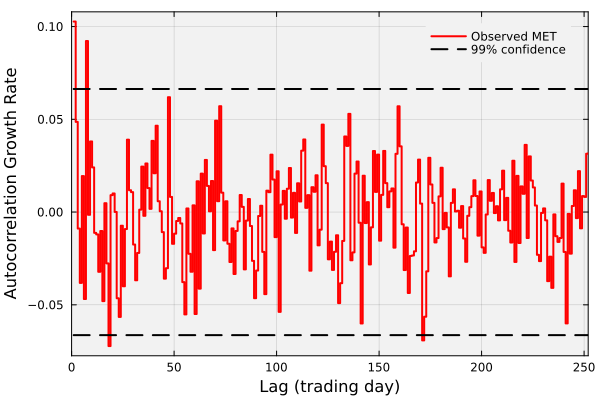

In [27]:
let

    # generate a random index -
    i = findfirst(ticker -> ticker == ticker_to_visualize,list_of_all_tickers);
    number_of_steps = maximum_number_trading_days - 1;
    max_number_of_steps_x = 252
    X = all_firms_growth_matrix[:,i];
    
    plot(autocor(X, (1:(number_of_steps - 1) |> collect)), label="Observed $(ticker_to_visualize)", lw=2, c=:red, 
        bg="gray95", background_color_outside="white", framestyle = :box, fg_legend = :transparent, linetype=:steppost,
     xlims=(0,max_number_of_steps_x))
    
    LINE = (2.576/sqrt(number_of_steps))*ones(number_of_steps-1);
    plot!(LINE, label="99% confidence", lw=2, c=:black, ls=:dash)
    plot!(-LINE, label="", lw=2, c=:black, ls=:dash)
    xlabel!("Lag (trading day)", fontsize=18)
    ylabel!("Autocorrelation Growth Rate", fontsize=18)

    # uncomment me to save to file -
    # savefig(joinpath(_PATH_TO_FIGS, "Fig-Autocorrelation-HMM-GenModel-$(ticker).pdf"));
end

### Volatility clustering
Next, let's consider volatility clustering. Volatility clustering is determined by examining the autocorrelation of the absolute values of the excess growth rate for different lag values. In actual data, we expect a positive absolute autocorrelation for short lags. Volatility clustering indicates that periods of high volatility, such as significant changes in returns, tend to occur close together in time.

#### Summary
`Unhide` the code block below to see how we computed and plotted the [autocorrelation function](https://en.wikipedia.org/wiki/Autocorrelation) for the absolute values of the simulated and observed out-of-sample excess growth rates.
* The observed out-of-sample dataset (orange line) shows a positive autocorrelation for lags less than approximately `10 days` at a 99% confidence level. This suggests the market has a memory of approximately 10 days or less following large disruptions.
* The excess growth rate trajectories produced by the Markov model (blue line) don't show volatility clustering; thus, this model (at least as it's currently implemented) will not capture the clustering of high-volatility events.

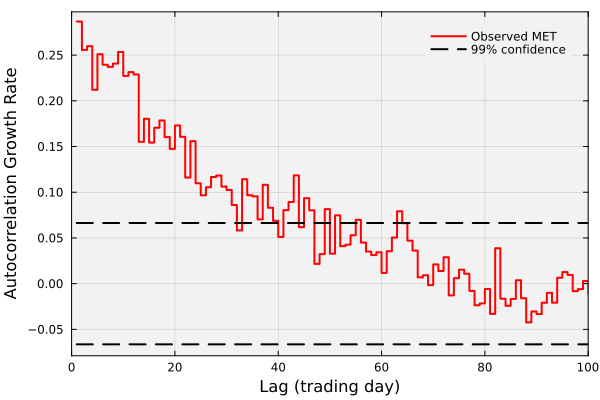

In [29]:
let

    # generate a random index -
    i = findfirst(ticker -> ticker == ticker_to_visualize,list_of_all_tickers);
    number_of_steps = maximum_number_trading_days - 1;
    max_number_of_steps_x = 100
    X = abs.(all_firms_growth_matrix[:,i]);
    
    plot(autocor(X, (1:(number_of_steps - 1) |> collect)), label="Observed $(ticker_to_visualize)", lw=2, c=:red, 
        bg="gray95", background_color_outside="white", framestyle = :box, fg_legend = :transparent, linetype=:steppost,
    xlims=(0,max_number_of_steps_x))
    
    LINE = (2.576/sqrt(number_of_steps))*ones(number_of_steps-1);
    plot!(LINE, label="99% confidence", lw=2, c=:black, ls=:dash)
    plot!(-LINE, label="", lw=2, c=:black, ls=:dash)
    xlabel!("Lag (trading day)", fontsize=18)
    ylabel!("Autocorrelation Growth Rate", fontsize=18)

    
    # uncomment me to save to file -
    # savefig(joinpath(_PATH_TO_FIGS, "Fig-Autocorrelation-HMM-GenModel-$(ticker).pdf"));
end

## Disclaimer and Risks
__This content is offered solely for training and informational purposes__. No offer or solicitation to buy or sell securities or derivative products or any investment or trading advice or strategy is made, given, or endorsed by the teaching team. 

__Trading involves risk__. Carefully review your financial situation before investing in securities, futures contracts, options, or commodity interests. Past performance, whether actual or indicated by historical tests of strategies, is no guarantee of future performance or success. Trading is generally inappropriate for someone with limited resources, investment or trading experience, or a low-risk tolerance.  Only risk capital that is not required for living expenses.

__You are fully responsible for any investment or trading decisions you make__. Such decisions should be based solely on evaluating your financial circumstances, investment or trading objectives, risk tolerance, and liquidity needs.